taking reference from: https://www.kaggle.com/fanbyprinciple/fastai-v4-walkthrough-bluebook-for-bulldozers

In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [15]:
from fastai.tabular.all import Path

In [16]:
path = Path('../input/house-prices-advanced-regression-techniques')

In [23]:
train_df = pd.read_csv(path/'train.csv')

In [24]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [19]:
dep_var = 'SalePrice'

In [ ]:
# lets use root mean squared log error as an extra metric

# df['dep_var_rmsle'] = np.log(df[dep_var])

In [25]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [21]:
submission_df = pd.read_csv(path/'sample_submission.csv')

In [22]:
submission_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [27]:
from fastai.tabular.all import *

In [28]:
procs = [Categorify, FillMissing]

In [29]:
train_df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010])

In [31]:
train_df['YrSold'].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

taking validation set as the year after 2009

In [37]:
cond = (train_df.YrSold < 2009)
train_idx = np.where(cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx), list(valid_idx))

In [38]:
cont, cat = cont_cat_split(train_df, 1, dep_var=dep_var)

In [39]:
to = TabularPandas(train_df, procs, cat, cont, y_names=dep_var, splits=splits)

In [40]:
len(to.train), len(to.valid)

(947, 513)

In [41]:
to.show(3)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,#na#,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,RL,Pave,#na#,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,#na#,#na#,#na#,WD,Normal,False,False,False,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500


In [42]:
xs, y = to.train.xs, to.train.y

In [43]:
valid_xs, valid_y = to.valid.xs, to.valid.y

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs,y)

# making a limited decision tree

DecisionTreeRegressor(max_leaf_nodes=4)

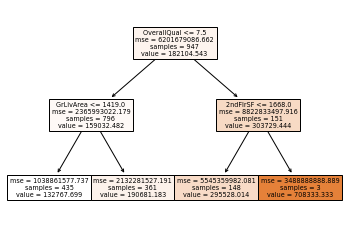

In [49]:
# lets visualise this tree
from sklearn import tree

_ = tree.plot_tree(m, feature_names=to.x_names, class_names=to.y_names, filled=True)

In [50]:
!pip install dtreeviz -qqq # qq for quiet install

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mxnet 1.7.0.post1 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.
autogluon-core 0.0.15b20201207 requires graphviz<0.9.0,>=0.8.1, but you have graphviz 0.16 which is incompatible.


In [52]:
from dtreeviz.trees import *

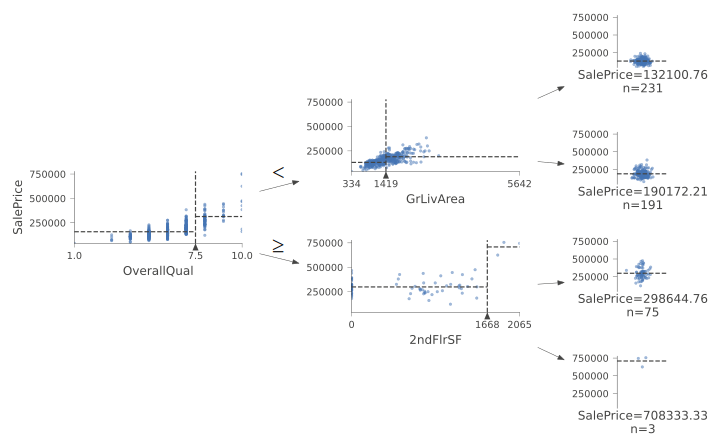

In [53]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
         fontname='DejaVu Sans', scale=1.6, label_fontsize=10, orientation='LR')

In [54]:
# lets make a full fledged tree

m = DecisionTreeRegressor()
m.fit(xs, y)

DecisionTreeRegressor()

In [57]:
def r_mse(pred, y):
    return round(math.sqrt(((pred-y)**2).mean()), 6)

def m_rmse(m, xs, y):
    return r_mse(m.predict(xs), y)

In [58]:
m_rmse(m, xs, y)

#perfect fit?

0.0

In [59]:
valid_xs = to.valid.xs
valid_y = to.valid.y

In [61]:
m_rmse(m, valid_xs, valid_y)
#woah
# this is the mean price

41048.308746

In [64]:
# lets restrict the numbe rof leaves
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

#mean price

(35764.638125, 38215.200928)

In [66]:
# lets use randomForestRegressor

from sklearn.ensemble import RandomForestRegressor

In [69]:
def rf(xs, y, n_estimators=540, max_samples=200, max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators, max_samples=max_samples,max_features=max_features, min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [70]:
m = rf(xs, y)

In [71]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(31959.087514, 32785.258326)

In [72]:
# estimators of different random forst model
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [73]:
preds

array([[166920.        , 271336.33333333, 164071.42857143, ...,
        215416.66666667, 271336.33333333, 134185.71428571],
       [144228.57142857, 175815.        , 137900.        , ...,
        406257.6       , 175815.        , 147094.44444444],
       [134555.55555556, 153150.        , 146208.33333333, ...,
        265112.85714286, 242800.        , 138711.11111111],
       ...,
       [135732.5       , 228971.        , 147162.5       , ...,
        252597.        , 184644.44444444, 136555.        ],
       [167503.8       , 170714.28571429, 141500.        , ...,
        246300.        , 245566.66666667, 111083.33333333],
       [120178.57142857, 240056.        , 156592.85714286, ...,
        170788.125     , 176141.66666667, 135783.33333333]])

In [74]:
r_mse(preds.mean(0), valid_y)

32785.258326

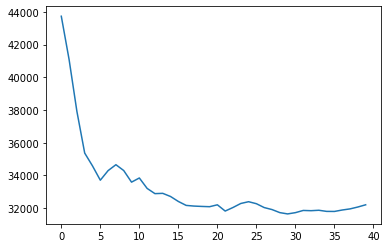

In [75]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)])

In [76]:
# lets look at out of bag error
r_mse(m.oob_prediction_, y)

35125.857433

Lets look at realtive feature importance

In [77]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols': df.columns, 'imp': m.feature_importances_}).sort_values('imp', ascending=False)

In [78]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
50,OverallQual,0.334884
62,GrLivArea,0.163993
72,GarageCars,0.056924
58,TotalBsmtSF,0.054140
73,GarageArea,0.053703
59,1stFlrSF,0.048440
18,ExterQual,0.039258
52,YearBuilt,0.026045
55,BsmtFinSF1,0.025421
65,FullBath,0.024902


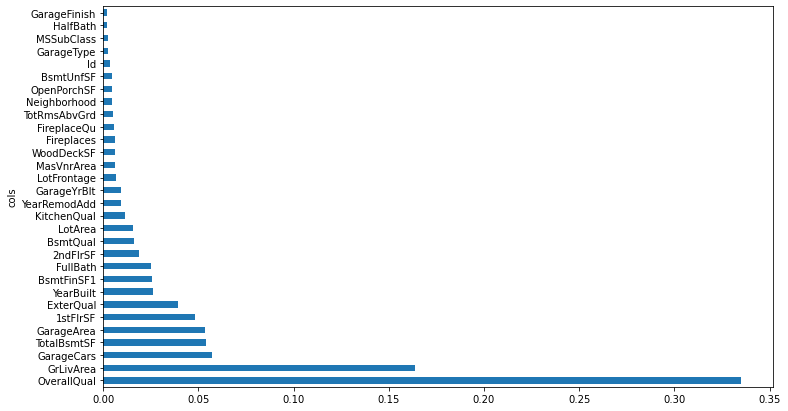

In [79]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30])

In [80]:
#lets remove low importance values
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

22

In [81]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [82]:
m = rf(xs_imp, y)

In [83]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(32179.728939, 32455.197063)

In [84]:
len(xs.columns), len(xs_imp.columns)

(83, 22)

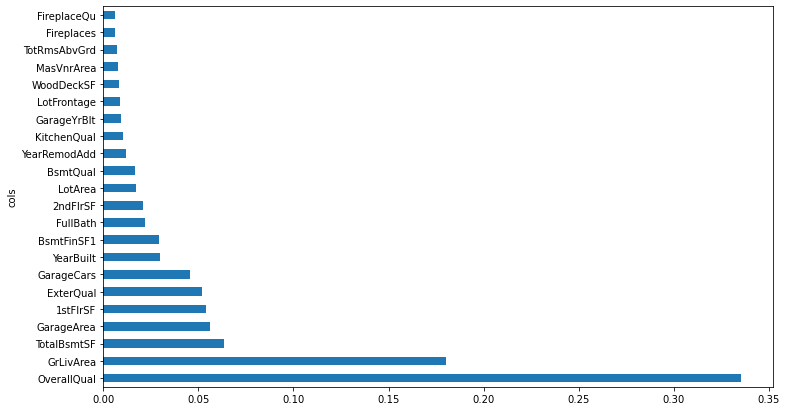

In [85]:
plot_fi(rf_feat_importance(m, xs_imp))

Looking redundant features

In [86]:
import scipy
from scipy. cluster import hierarchy as hc

In [87]:
def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

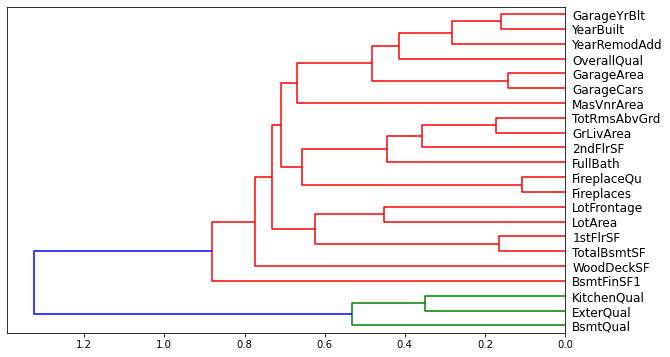

In [88]:
cluster_columns(xs_imp)

# this shows columns that are most similar

I am not removing these features, because we already have sizably reduced the number of features

### lets look at tree intrepreter

In [89]:
!pip install treeinterpreter -qqq

In [90]:
!pip install waterfallcharts -qqq

  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3411 sha256=27ede0f81bc1e1ea5a8263a4e36afe3f2f9f4cc9b1f5fbc1b9148f5346489dee
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [93]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [94]:
row = valid_xs_imp.iloc[:5]

In [96]:
prediction, bias, contributions = treeinterpreter.predict(m, row.values)

In [97]:
prediction[0], bias[0], contributions[0].sum()

(array([151605.43808898]), 182074.25361111131, -30468.8155221322)

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

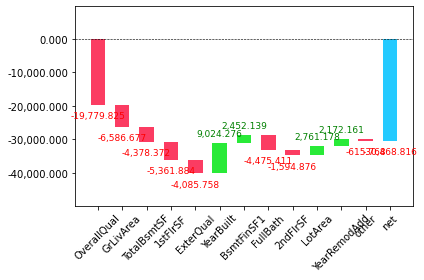

In [99]:
waterfall(valid_xs_imp.columns, contributions[0], threshold=0.08, rotation_value=45, formatting='{:,.3f}')

In [100]:
 # inference
    
test_df = pd.read_csv(path/'test.csv')

In [101]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [107]:
# to check wehether test Id is submission id
list(test_df['Id']) == list(submission_df['Id']) 

True

In [109]:
# predicting on one row

row = test_df.iloc[0]
try:
    m.predict(row)
except Exception as e:
    print(e)

could not convert string to float: 'RH'


we need to convert test_df as we converted train data
for inference:

https://forums.fast.ai/t/single-prediction-on-new-data-from-tabular-data-learner/28792/3


In [114]:
for i in to.__dict__:
    print(i)

dataloaders
items
y_names
device
cat_names
cont_names
procs
split


In [115]:
test_dls = to.dataloaders(test_df)

In [116]:
row = test_dls[0]

In [118]:
for i in row.__dict__:
    print(i)

after_item
before_batch
after_batch
__stored_args__
dataset
bs
shuffle
drop_last
indexed
n
pin_memory
timeout
device
rng
num_workers
offs
fake_l
_n_inp
_types


In [123]:
row.dataset.iloc[0]

Id                     1.0
MSSubClass            60.0
MSZoning               4.0
LotFrontage           65.0
LotArea             8450.0
                    ...   
SaleCondition          5.0
SalePrice         208500.0
LotFrontage_na         1.0
MasVnrArea_na          1.0
GarageYrBlt_na         1.0
Name: 0, Length: 84, dtype: float64

In [127]:
try:
    m.predict()
except Exception as e:
    print(e)

ValueError: cannot copy sequence with size 947 to array axis with dimension 84